<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

# Восстановление золота из руды

Цель проекта: Подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Задачи:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as mae
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [2]:
try:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 10000)
except:
    data_train = pd.read_csv("C:/Users/iyaro/Downloads/gold_industry_train.csv")
    data_test = pd.read_csv("C:/Users/iyaro/Downloads/gold_industry_test.csv")
    data_full = pd.read_csv("C:/Users/iyaro/Downloads/gold_industry_full.csv")
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 10000)

In [3]:
data_train.head(10)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [5]:
data_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [7]:
data_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [8]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Столбец date имеет тип object, всего у нас 87 столбцов. В тестовом фрейме их 53.

In [9]:
df_train = pd.Series(data_train.columns)
df_test = pd.Series(data_test.columns)

In [10]:
df_difference = df_train[~df_train.isin(df_test)]
df_difference

23        rougher.calculation.sulfate_to_au_concentrate
24    rougher.calculation.floatbank10_sulfate_to_au_...
25    rougher.calculation.floatbank11_sulfate_to_au_...
26                      rougher.calculation.au_pb_ratio
27                        rougher.output.concentrate_au
28                        rougher.output.concentrate_ag
29                        rougher.output.concentrate_pb
30                       rougher.output.concentrate_sol
31                              rougher.output.recovery
32                               rougher.output.tail_au
33                               rougher.output.tail_ag
34                               rougher.output.tail_pb
35                              rougher.output.tail_sol
48                primary_cleaner.output.concentrate_au
49                primary_cleaner.output.concentrate_ag
50                primary_cleaner.output.concentrate_pb
51               primary_cleaner.output.concentrate_sol
52                       primary_cleaner.output.

In [11]:
df_difference.count()

34

Я получил список столбцов, которых нет в тестовой выборке.

Столбцы связаны с параметрами продукта, расчётными характеристиками и финальными результатами. Обучать модель будем без них.




Возможно эти данные появляются позже, чем мы хотим получить прогноз. То есть прогноз надо получить сейчас, а данные по тем столбцам появятся позже.

Посчитаю Mae для столбца rougher.output.recovery.

In [12]:
data_train['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

In [13]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

In [14]:
recovery = pd.concat([C,F,T], axis=1)
recovery.columns = ['C','F','T']

In [15]:
recovery['rec'] = (recovery['C']*(recovery['F']-recovery['T'])) / (recovery['F']*(recovery['C']-recovery['T'])) * 100
pred = recovery['rec']

In [16]:
true = data_train['rougher.output.recovery']
MAE = mae(true, pred)
round(MAE, 4)

0.0

Эфективность обогащения рассчитана правильно. MAE практичесики 0.


In [17]:
data_train.isna().sum()

date                                                    0
rougher.input.feed_au                                   0
rougher.input.feed_ag                                   0
rougher.input.feed_pb                                  72
rougher.input.feed_sol                                 77
rougher.input.feed_rate                                 7
rougher.input.feed_size                               101
rougher.input.floatbank10_sulfate                      31
rougher.input.floatbank10_xanthate                      7
rougher.state.floatbank10_a_air                         0
rougher.state.floatbank10_a_level                       0
rougher.state.floatbank10_b_air                         0
rougher.state.floatbank10_b_level                       0
rougher.state.floatbank10_c_air                         0
rougher.state.floatbank10_c_level                       0
rougher.state.floatbank10_d_air                         0
rougher.state.floatbank10_d_level                       0
rougher.state.

In [18]:
data_full.isna().sum()

date                                                     0
rougher.input.feed_au                                    0
rougher.input.feed_ag                                    0
rougher.input.feed_pb                                  100
rougher.input.feed_sol                                  99
rougher.input.feed_rate                                 11
rougher.input.feed_size                                145
rougher.input.floatbank10_sulfate                       34
rougher.input.floatbank10_xanthate                       8
rougher.state.floatbank10_a_air                          1
rougher.state.floatbank10_a_level                        1
rougher.state.floatbank10_b_air                          1
rougher.state.floatbank10_b_level                        1
rougher.state.floatbank10_c_air                          1
rougher.state.floatbank10_c_level                        1
rougher.state.floatbank10_d_air                          0
rougher.state.floatbank10_d_level                       

In [19]:
data_test.isna().sum()

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


In [20]:
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')

In [21]:
data_train = data_train.fillna(data_train.median())
data_full = data_full.fillna(data_full.median())
data_test = data_test.fillna(data_full.median())

C:\Users\iyaro\AppData\Local\Temp\ipykernel_22448\2016761607.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_train = data_train.fillna(data_train.median())
C:\Users\iyaro\AppData\Local\Temp\ipykernel_22448\2016761607.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_full = data_full.fillna(data_full.median())
C:\Users\iyaro\AppData\Local\Temp\ipykernel_22448\2016761607.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_test = data_test.fillna(data_full.median())


Большую часть пропусков заполнил медианой по месяцу и году. Остальные медианой по столбцу.

In [22]:
data_train.duplicated().sum()

0

In [23]:
data_full.duplicated().sum()

0

In [24]:
data_test.duplicated().sum()

0

In [25]:
data_train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,1.457900e+04,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,1.457900e+04,14579.000000,1.457900e+04,14579.000000,1.457900e+04,14579.000000,1.457900e+04,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579

In [26]:
data_full.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,1.943900e+04,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,1.943900e+04,19439.000000,1.943900e+04,19439.000000,1.943900e+04,19439.000000,1.943900e+04,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439

In [27]:
data_test.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4.860000e+03,4860.000000,4.860000e+03,4860.000000,4.860000e+03,4860.000000,4.860000e+03,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000
mean,8.005584,8.547348,3.579404,37.096348,490.292618,59.072630,12.055701,6.101289,1108.613762,-368.326120,1312.343845,-472.512145,1291.640046,-472.908031,1204.066585,-473.380689,1075.268575,-471.465792,1023.769668,-471.412834,11.969125,6.119127,143.201678,8.691235,7.305514,1.006987,1588.389551,-488.225583,1589.299443,-490.257889,1588.910135,-489.743647,1530.316262,-485.899372,29.478379,-499.504698,24.732357,-499.556821,2.889628e+01,-489.477466,2.263260e+01,-494.766852,1.985733e+01,-488.667438,1.557012e+01,-464.183766,16.593775,-490.817099,12.945575,-489.585694,19.054074,-504.677972
std,1.993590,1.958601,1.026413,4.915124,94.333135,19.043111,3.406591,1.042648,156.484645,91.151779,158.985422,49.373293,180.185168,47.608382,184.547737,47.828848,159.877123,51.413832,147.827669,51.838763,3.453267,1.044089,42.355701,3.166780,0.588602,0.492515,124.930225,36.669241,132.089301,35.200354,132.662124,33.647529,256.219978,43.292139,5.288220,43.279932,5.483658,43.615297,6.158467e+00,51.822197,5.456242e+00,40.677375,5.912556e+00,44.388435,4.926861e+00,65.702182,5.723762,32.255381,5.532676,37.081090,5.548440,38.686262
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,767.656587,-649.997496,831.537936,-552.657032,706.281918,-648.118446,695.211786,-598.926149,539.633937,-649.376184,0.000163,0.002616,7.329299,0.000000,4.970000,0.000154,314.241165,-653.477578,319.959489,-799.260788,273.536823,-709.213816,131.321672,-799.791618,0.122013,-799

Также в обучении мы не будем использовать столбец с датой. Признаками оставлю все столбцы из data_test.

In [28]:
df_target = data_full[['date','rougher.output.recovery','final.output.recovery']]
data_test = data_test.merge(df_target, how='left', on='date')

In [29]:
data_train = data_train.drop('date', axis=1)
data_full = data_full.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)

# Вывод

В данных встретились пропуски. В тестовых данных меньше столбцов, возможно значения этих столбцов появляются позже. В остальном все хорошо. MSE равно почти 0. Значит расчеты верны.

## Анализ данных

In [30]:
df_con_ag = data_full.filter(regex='concentrate_ag')
df_con_ag.head()

,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,11.500771,8.547551,6.055403
1,11.615865,8.558743,6.029369
2,11.695753,8.603505,6.055926
3,11.915047,7.221879,6.047977
4,12.411054,9.089428,6.148599


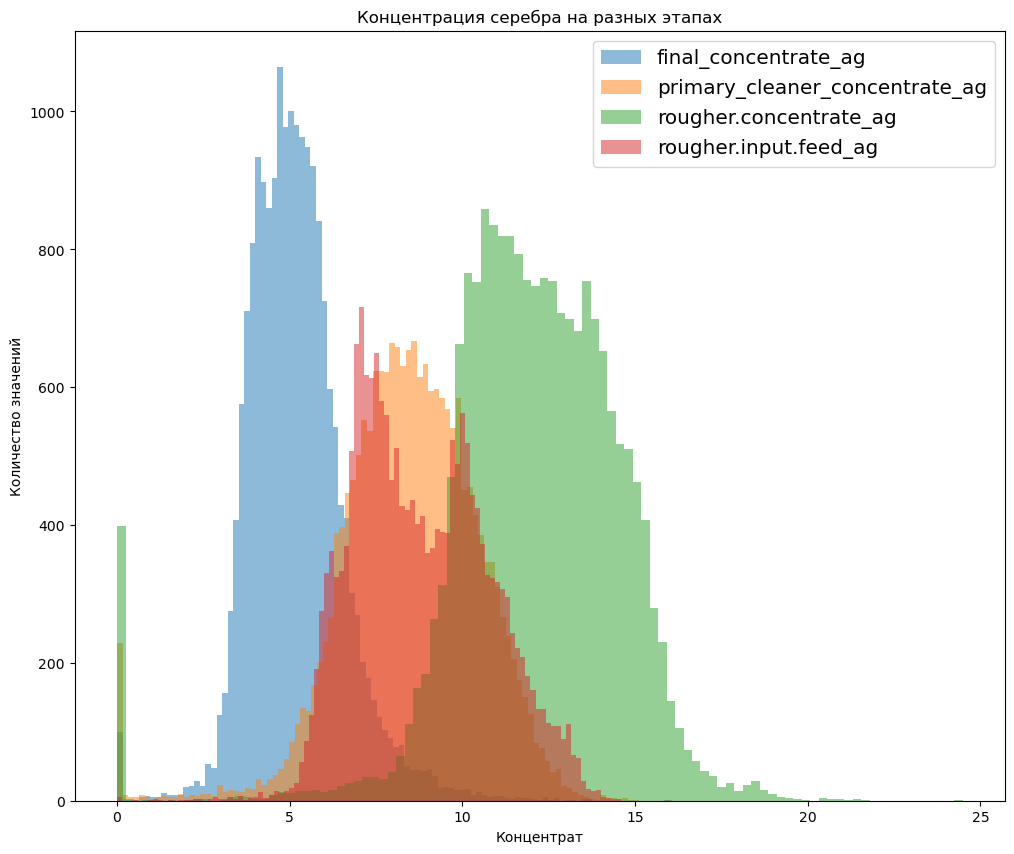

In [31]:
plt.figure(figsize=[12,10])
plt.hist(df_con_ag['final.output.concentrate_ag'], bins=100, label='final_concentrate_ag', alpha=0.5)
plt.hist(df_con_ag['primary_cleaner.output.concentrate_ag'], bins=100, label='primary_cleaner_concentrate_ag', alpha=0.5 )
plt.hist(df_con_ag['rougher.output.concentrate_ag'], bins=100, label='rougher.concentrate_ag', alpha=0.5)
plt.hist(data_full['rougher.input.feed_ag'], bins=100, label='rougher.input.feed_ag', alpha=0.5)

plt.title("Концентрация серебра на разных этапах")
plt.xlabel("Концентрат")
plt.ylabel("Количество значений")

plt.legend(loc='upper right', fontsize='x-large')



plt.show()

Сначала концентрация серебра равна 5-12, после флотации возрастает. Потом концентрация серебра сокращается поэтапно. В конце концентрация колеблится в основном от 3х до 7.

In [32]:
df_con_au = data_full.filter(regex='concentrate_au')
df_feed_au = data_full['rougher.input.feed_au']
df_con_au.head()

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,19.793808,34.174427,42.192020
1,20.050975,34.118526,42.701629
2,19.737170,33.969464,42.657501
3,19.320810,28.260743,42.689819
4,19.216101,33.044932,42.774141


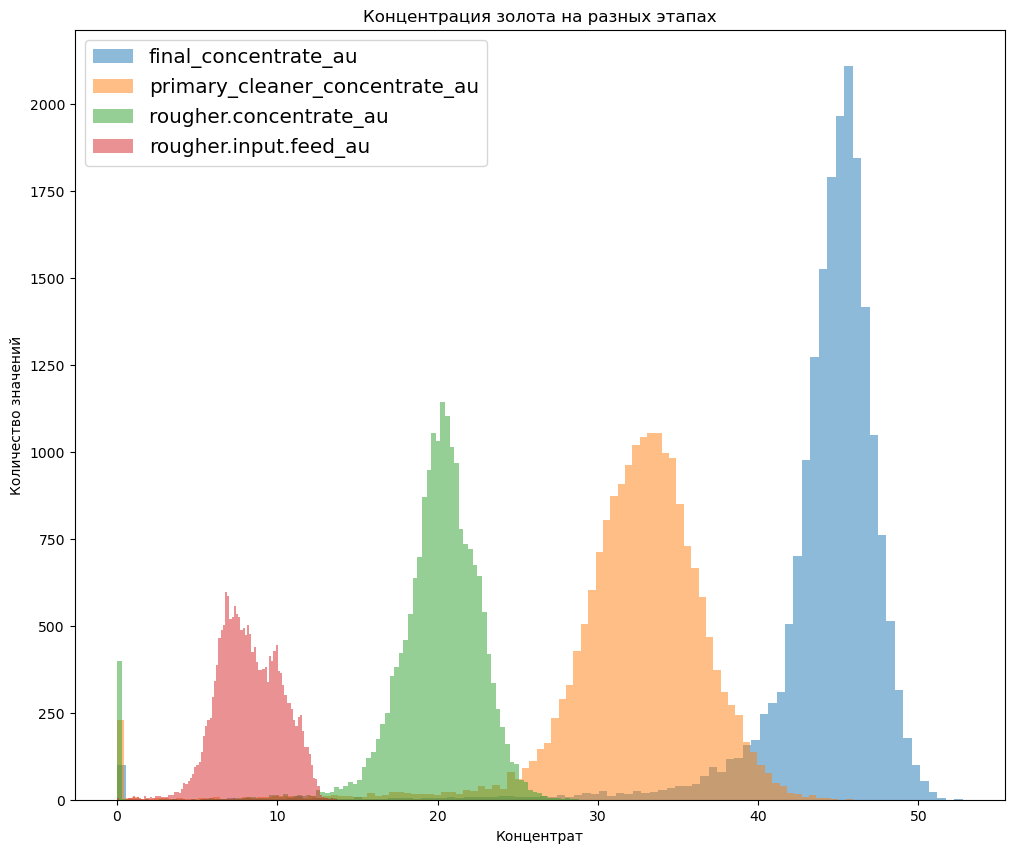

In [33]:
plt.figure(figsize=[12,10])

plt.hist(df_con_au['final.output.concentrate_au'], bins=100, label='final_concentrate_au', alpha=0.5)
plt.hist(df_con_au['primary_cleaner.output.concentrate_au'], bins=100, label='primary_cleaner_concentrate_au', alpha=0.5 )
plt.hist(df_con_au['rougher.output.concentrate_au'], bins=100, label='rougher.concentrate_au ', alpha=0.5)
plt.hist(df_feed_au, bins=100, label='rougher.input.feed_au', alpha=0.5)


plt.title("Концентрация золота на разных этапах")
plt.xlabel("Концентрат")
plt.ylabel("Количество значений")

plt.legend(loc='upper left', fontsize='x-large')



plt.show()

Концентрация золота поэтапно растет. До флотации концентрация золота от 5 до 13. На этапе флотации концентрация распределена в среднем от 15 до 25, на этапе первичной очистки от 25 до 40. А вот на финальном этапе концентрация рпспределена от 35 до 50. Среднее значение близко к 45 на финальном этапе.

In [34]:
df_con_pb = data_full.filter(regex='concentrate_pb') 
df_feed_pb = data_full['rougher.input.feed_pb']
df_con_pb.head()

,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,7.101074,10.389648,9.889648
1,7.278807,10.497069,9.968944
2,7.216833,10.354494,10.213995
3,7.175616,8.496563,9.977019
4,7.240205,9.986786,10.142511


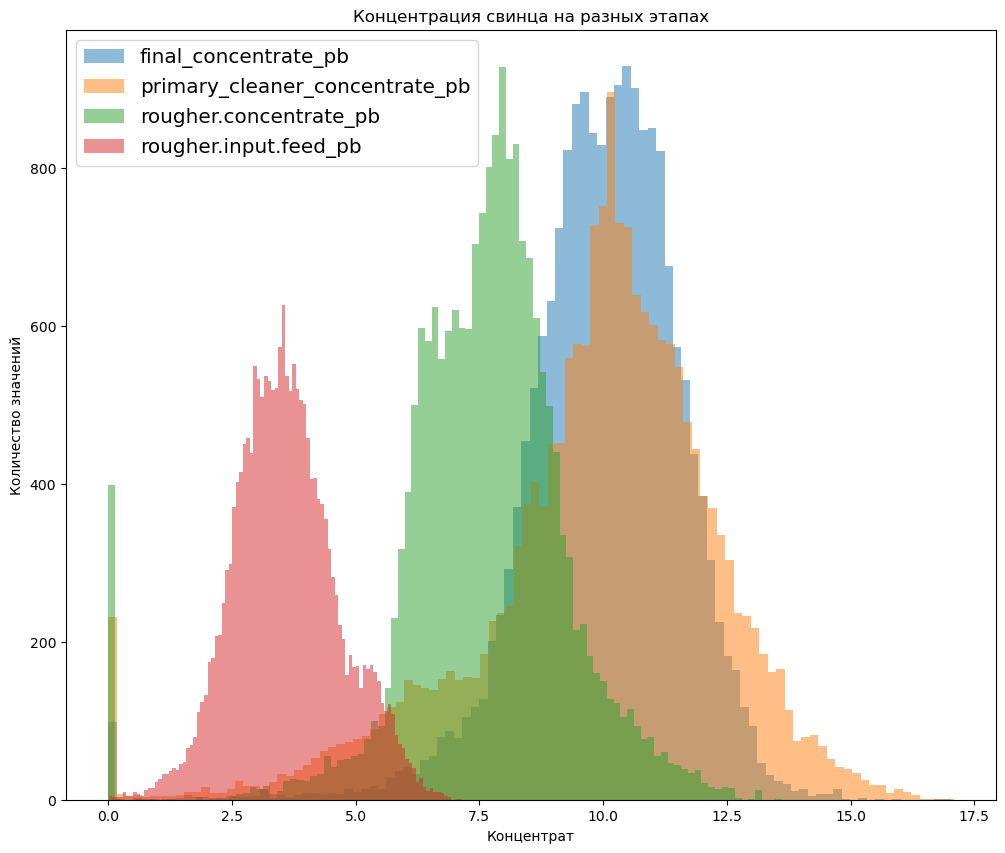

In [35]:
plt.figure(figsize=[12,10])

plt.hist(df_con_pb['final.output.concentrate_pb'], bins=100, label='final_concentrate_pb', alpha=0.5)
plt.hist(df_con_pb['primary_cleaner.output.concentrate_pb'], bins=100, label='primary_cleaner_concentrate_pb', alpha=0.5 )
plt.hist(df_con_pb['rougher.output.concentrate_pb'], bins=100, label='rougher.concentrate_pb', alpha=0.5)
plt.hist(df_feed_pb, bins=100, label='rougher.input.feed_pb', alpha=0.5)

plt.title("Концентрация свинца на разных этапах")
plt.ylabel("Количество значений")
plt.xlabel("Концентрат")

plt.legend(loc='upper left', fontsize='x-large')

plt.show()


Концентрация свинца сильно изменяется после флотации. От средних 3  к 7.5. Концентрация свинца после первичной очистки изменяется не сильно. На этапе флотации пик 7.5. Потом 11.

In [36]:
data_test_feed = data_test.filter(regex='feed_size', axis=1)
data_train_feed = data_train.filter(regex='feed_size', axis=1)

In [37]:
print(data_test_feed.head())
print(data_train_feed.head())

   rougher.input.feed_size  primary_cleaner.input.feed_size
0                94.544358                         6.500000
1               123.742430                         6.500000
2                82.610855                         6.500000
3                77.984784                         6.660000
4                86.434874                         6.426667
   rougher.input.feed_size  primary_cleaner.input.feed_size
0                55.486599                             7.25
1                57.278666                             7.25
2                57.510649                             7.25
3                57.792734                             7.25
4                56.047189                             7.25


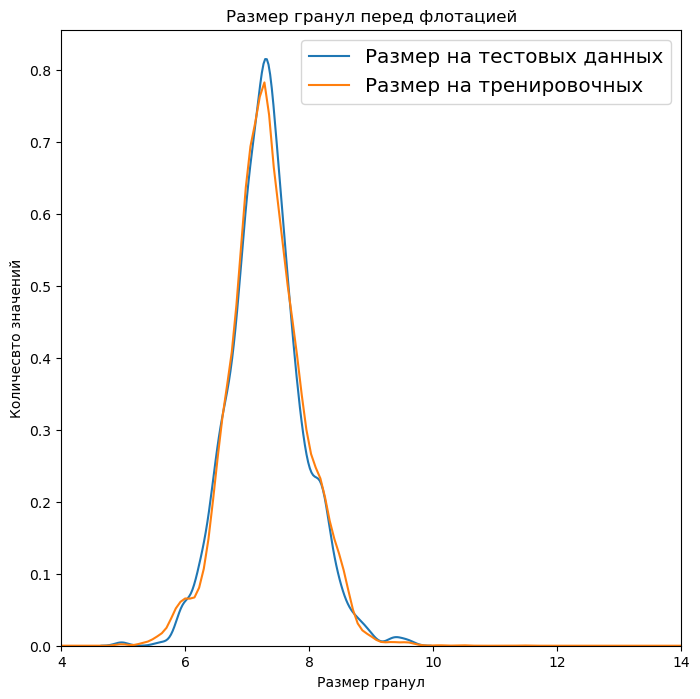

In [38]:
plt.figure(figsize=[8,8])

sns.kdeplot(data=data_test_feed, x = 'primary_cleaner.input.feed_size')
sns.kdeplot(data = data_train_feed, x = 'primary_cleaner.input.feed_size')

plt.title('Размер гранул перед флотацией')
plt.ylabel('Количесвто значений')
plt.xlabel('Размер гранул')

plt.legend(loc='upper right', fontsize='x-large',
           labels=['Размер на тестовых данных','Размер на тренировочных'])

plt.xlim(4,14)
plt.show()


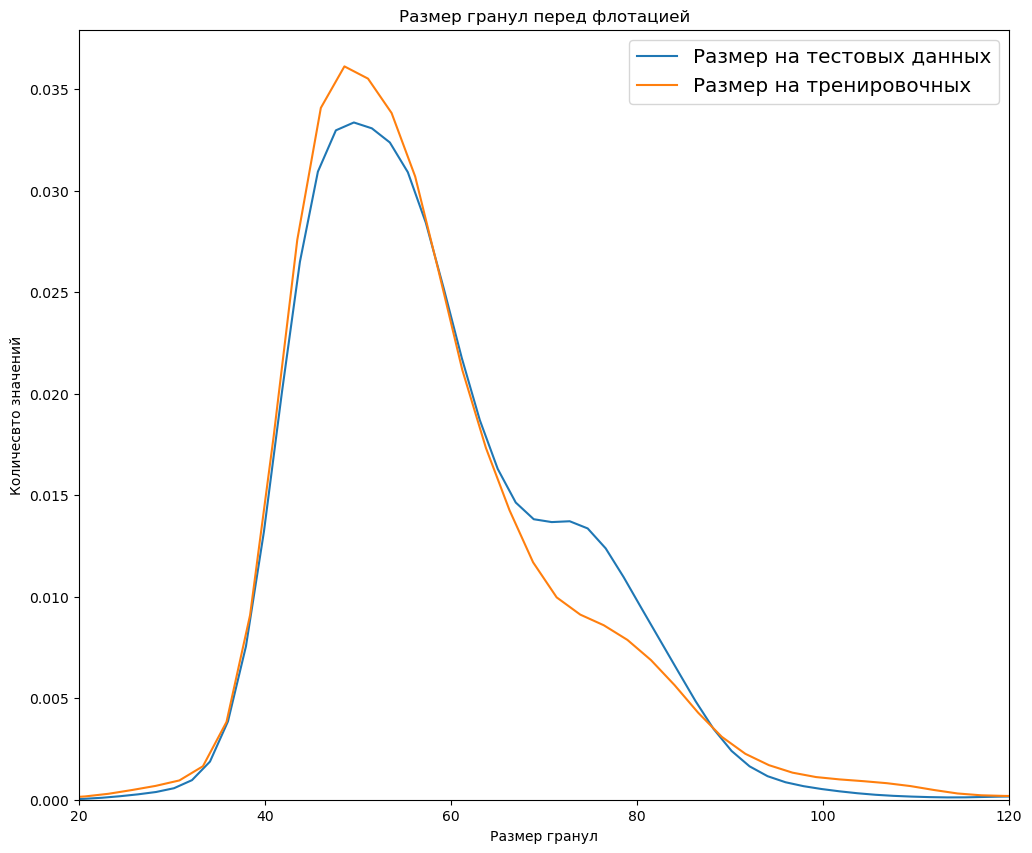

In [39]:
plt.figure(figsize=[12,10])

sns.kdeplot(data=data_test_feed, x = 'rougher.input.feed_size')
sns.kdeplot(data = data_train_feed, x = 'rougher.input.feed_size')

plt.title('Размер гранул перед флотацией')
plt.ylabel('Количесвто значений')
plt.xlabel('Размер гранул')

plt.legend(loc='upper right', fontsize='x-large',
           labels=['Размер на тестовых данных','Размер на тренировочных'])

plt.xlim([20, 120])
plt.show()


Cтолбец primary_cleaner.input.feed_size на двух датафреймах выглядит одинаокво, а аот столбец rougher.input.feed_size немного отличается, но не критично. Данные распределены нормально.


In [40]:
data_final_con = data_full.filter(regex='final.output.concentrate')
data_primary_con = data_full.filter(regex='primary_cleaner.output.concentrate')
data_rouger_con = data_full.filter(regex='rougher.output.concentrate')
inputs = data_full.filter(regex='rougher.input.feed').drop(['rougher.input.feed_rate', 'rougher.input.feed_size'], axis=1)

final_con = data_final_con.sum(axis=1)
primary_con = data_primary_con.sum(axis=1)
rouger_con = data_rouger_con.sum(axis=1)
inputs = inputs.sum(axis=1)

In [41]:
inputs

0        51.680034
1        50.659114
2        50.609929
3        51.061546
4        47.859163
           ...    
19434    55.136720
19435    55.723433
19436    54.950157
19437    52.807165
19438    51.941235
Length: 19439, dtype: float64

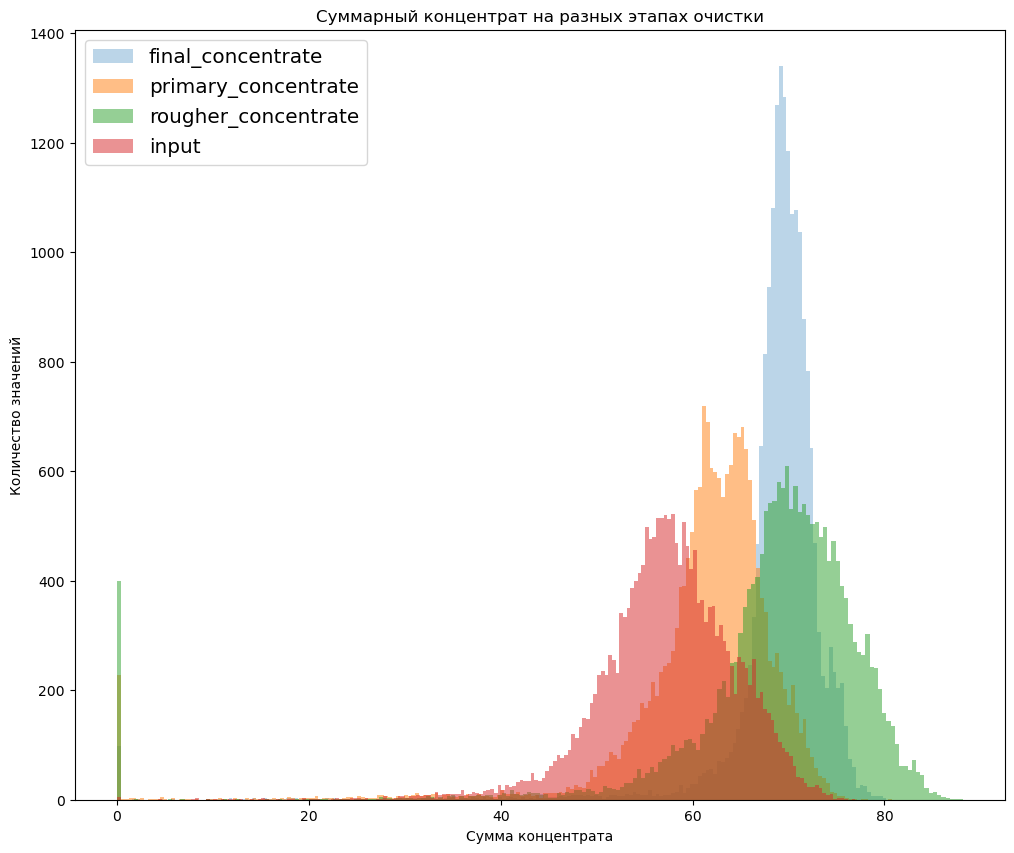

In [42]:
plt.figure(figsize=[12,10])

plt.hist(final_con, bins=200, label = 'final_concentrate', alpha=0.3)
plt.hist(primary_con, bins=200, label = 'primary_concentrate', alpha=0.5)
plt.hist(rouger_con, bins=200, label = 'rougher_concentrate', alpha=0.5)
plt.hist(inputs, bins=200, label = 'input', alpha=0.5)

plt.title('Суммарный концентрат на разных этапах очистки')
plt.ylabel('Количество значений')
plt.xlabel('Сумма концентрата')

plt.legend(loc='upper left', fontsize='x-large')

#plt.xlim([20, 90])
#plt.ylim([0, 1300])

plt.show()

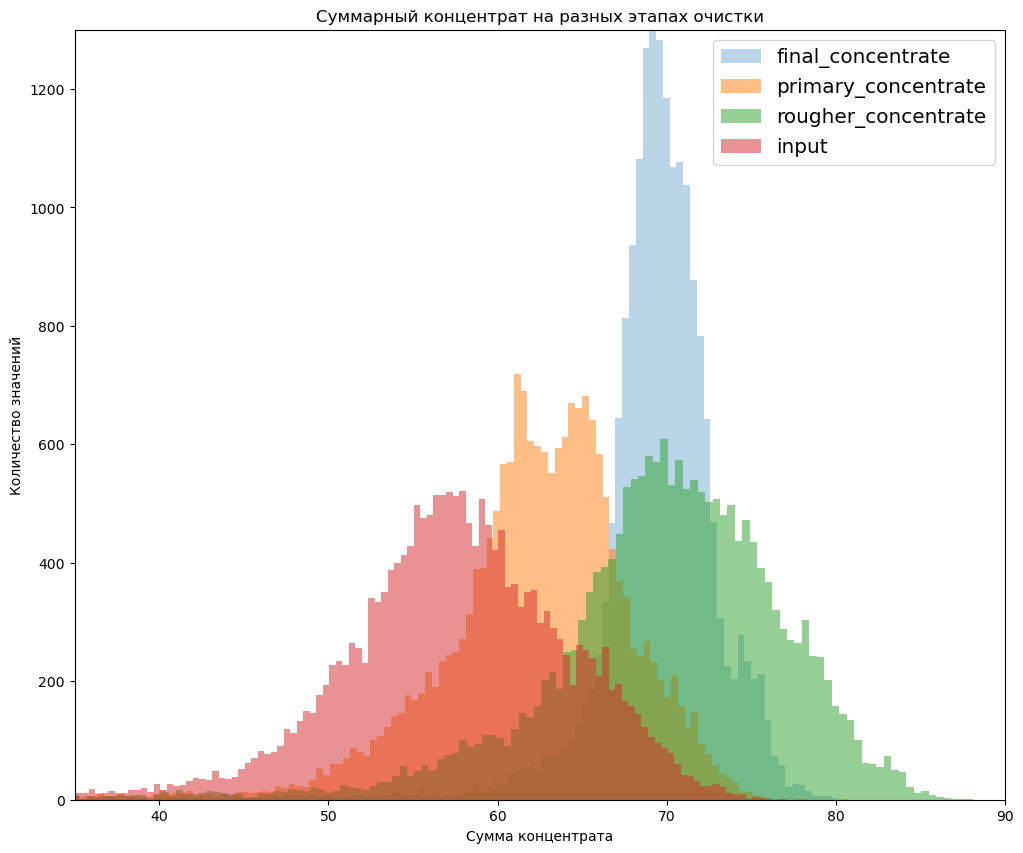

In [43]:
plt.figure(figsize=[12,10])

plt.hist(final_con, bins=200, label = 'final_concentrate', alpha=0.3)
plt.hist(primary_con, bins=200, label = 'primary_concentrate', alpha=0.5)
plt.hist(rouger_con, bins=200, label = 'rougher_concentrate', alpha=0.5)
plt.hist(inputs, bins=200, label = 'input', alpha=0.5)

plt.title('Суммарный концентрат на разных этапах очистки')
plt.ylabel('Количество значений')
plt.xlabel('Cумма концентрата')

plt.legend(loc='upper right', fontsize='x-large')

plt.xlim([35, 90])
plt.ylim([0, 1300])

plt.show()

Видим нулевые значения. их около 400ста. Я считаю, что концентрат не может равняться 0, поэтому я их удалю. Финальный концентрат имеет меньщий диапозон значений, пик 70. После первичной обработки концентрат меньше, чем после флотации. Самый маленькие значения до флотации. Пик достигает 55.

Суммарная концентрация достаточно динамичная константа. На разных этапах варируется от 40 до 85, к финальному концентрату рычаг сжимается и разброс становится в среднем от 65 до 75

In [44]:
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_au'] == 0].index)
data_train = data_train.reset_index(drop=True)

In [45]:
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_pb'] == 0].index)
data_train = data_train.reset_index(drop=True)

In [46]:
data_train = data_train.drop(data_train[data_train['final.output.concentrate_au'] == 0].index)
data_train = data_train.reset_index(drop=True)

In [47]:
data_train[data_train['primary_cleaner.output.concentrate_pb'] == 0]

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


In [48]:
data_train[data_train['primary_cleaner.output.concentrate_sol'] == 0]


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


In [49]:
data_train[data_train['primary_cleaner.output.concentrate_ag'] == 0]

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


In [50]:
data_train[data_train['rougher.output.concentrate_pb'] == 0]

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


In [51]:
data_train[data_train['final.output.concentrate_au'] == 0]

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


In [52]:
data_train[data_train['rougher.input.feed_au'] == 0]

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


# Вывод
Данные нормально распределены.

Устранены аномалии со значениями равными 0.

Данные готовы к обучению, осталось только определить признаки.

## Модель

Сначала надо определть признаки. Как я говорил, признаками я возьму все столбцы из тестовых данных за исключением даты, а также в тренировочных данных оставлю целевые признаки. После подготовки данных к обучению, я напишу функцию расчета sMAPE.

In [53]:
unwanted_cols = set(data_train.columns) - set(data_test.columns)
data_train = data_train.drop(columns=unwanted_cols)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13988 entries, 0 to 13987
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       13988 non-null  float64
 1   rougher.input.feed_ag                       13988 non-null  float64
 2   rougher.input.feed_pb                       13988 non-null  float64
 3   rougher.input.feed_sol                      13988 non-null  float64
 4   rougher.input.feed_rate                     13988 non-null  float64
 5   rougher.input.feed_size                     13988 non-null  float64
 6   rougher.input.floatbank10_sulfate           13988 non-null  float64
 7   rougher.input.floatbank10_xanthate          13988 non-null  float64
 8   rougher.state.floatbank10_a_air             13988 non-null  float64
 9   rougher.state.floatbank10_a_level           13988 non-null  float64
 10  rougher.st

In [54]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4860 entries, 0 to 4859
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       4860 non-null   float64
 1   rougher.input.feed_ag                       4860 non-null   float64
 2   rougher.input.feed_pb                       4860 non-null   float64
 3   rougher.input.feed_sol                      4860 non-null   float64
 4   rougher.input.feed_rate                     4860 non-null   float64
 5   rougher.input.feed_size                     4860 non-null   float64
 6   rougher.input.floatbank10_sulfate           4860 non-null   float64
 7   rougher.input.floatbank10_xanthate          4860 non-null   float64
 8   rougher.state.floatbank10_a_air             4860 non-null   float64
 9   rougher.state.floatbank10_a_level           4860 non-null   float64
 10  rougher.stat

In [55]:
features_train_r = data_train.filter(regex='rougher',axis=1).drop(['rougher.output.recovery'], axis=1)
cols = set(data_train.columns) - set(features_train_r.columns)
features_train_f = data_train.drop(cols, axis=1)

target_train_rouger = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']

features_test_r = data_test.filter(regex='rougher',axis=1).drop(['rougher.output.recovery'], axis=1)
features_test_f = data_test.drop(cols, axis=1)


target_test_rouger = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

In [56]:
pd.options.mode.chained_assignment = None
numeric_r = features_train_r.columns
scaler = StandardScaler()
scaler.fit(features_train_r[numeric_r])
features_train_r[numeric_r] = scaler.transform(features_train_r[numeric_r])
features_test_r[numeric_r] = scaler.transform(features_test_r[numeric_r])

numeric_f = features_train_f.columns
scaler_1 = StandardScaler()
scaler_1.fit(features_train_f[numeric_f])
features_train_f[numeric_f] = scaler_1.transform(features_train_f[numeric_f])
features_test_f[numeric_f] = scaler_1.transform(features_test_f[numeric_f])

Напишу функции sMape.

In [57]:
def smape(predicted, target):
    return 1/len(predicted) * np.sum(np.abs(target-predicted) /
                                     ((np.abs(target) + np.abs(predicted)) / 2)) * 100

In [58]:
def final_smape(smape_rouger, smape_final):
    return (0.25 * smape_rouger + 0.75 * smape_final)

Функция готова, осталось подобрать модели и проверить их кросс-валидацией.

Cначала подберем модель для rougher.output.recovery.

In [59]:
RANDOM_STATE=12345

In [60]:
model = LinearRegression()
scorer = make_scorer(smape, greater_is_better=False)
rouger_lin = cvs(model, features_train_r, target_train_rouger, scoring=scorer, cv=5).mean()
final_lin =  cvs(model, features_train_f, target_train_final, scoring=scorer, cv=5).mean()
print('Итоговое sMape для линейной регрессии:', final_smape(rouger_lin, final_lin) * (-1))

Итоговое sMape для линейной регрессии: 8.701776915101645


In [61]:
model_1r = DecisionTreeRegressor(random_state=RANDOM_STATE)
rouger_tree = cvs(model_1r, features_train_r, target_train_rouger, scoring=scorer, cv=5).mean()
model_1f = DecisionTreeRegressor(random_state=RANDOM_STATE)
final_tree =  cvs(model_1f, features_train_f, target_train_final, scoring=scorer, cv=5).mean()



In [62]:

print('sMAPE для решающего дерева без подбора гипперпараметров:',final_smape(rouger_tree, final_tree)* (-1))


sMAPE для решающего дерева без подбора гипперпараметров: 14.380314827498843


In [63]:
params_model_tree = {
    'max_depth':[1,2,3,4,5,6,7,8]
}


gird_cv_tree_r = GridSearchCV(estimator=model_1r,
                              param_grid=params_model_tree,
                              scoring=scorer,
                              n_jobs=-1,
                              verbose=10,
                              cv=3
                             )

gird_cv_tree_r.fit(features_train_r, target_train_rouger)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1, param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=10)

In [64]:
best_hp_tree_r = gird_cv_tree_r.best_params_
best_hp_tree_r, gird_cv_tree_r.best_score_ * (-1)

({'max_depth': 4}, 6.811777221096086)

In [65]:
gird_cv_tree_f = GridSearchCV(estimator=model_1r,
                              param_grid=params_model_tree,
                              scoring=scorer,
                              n_jobs=-1,
                              verbose=10,
                              cv=3
                             )

gird_cv_tree_f.fit(features_train_f, target_train_final)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1, param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=10)

In [66]:
model_1r = DecisionTreeRegressor(random_state=RANDOM_STATE, **gird_cv_tree_r.best_params_)
rouger_tree = cvs(model_1r, features_train_r, target_train_rouger, scoring=scorer, cv=5).mean()
model_1f = DecisionTreeRegressor(random_state=RANDOM_STATE, **gird_cv_tree_f.best_params_)
final_tree =  cvs(model_1f, features_train_f, target_train_final, scoring=scorer, cv=5).mean()


In [67]:
print('Итоговое sMape для дерева решений:', final_smape(gird_cv_tree_r.best_score_, gird_cv_tree_f.best_score_)* (-1))

Итоговое sMape для дерева решений: 8.816875298011288


Для дерева решений я подобрал 2 модели, они определяют разные таргеты.

In [68]:
model_forest_r = RandomForestRegressor(random_state=RANDOM_STATE)
rouger_forest = cvs(model_1r, features_train_r, target_train_rouger, scoring=scorer, cv=5).mean()
model_forest_f = RandomForestRegressor(random_state=RANDOM_STATE)
final_forest =  cvs(model_1f, features_train_f, target_train_final, scoring=scorer, cv=5).mean()
print('sMAPE для cлучайного леса без подбора гипперпараметров:',final_smape(rouger_forest, final_forest)* (-1))


sMAPE для cлучайного леса без подбора гипперпараметров: 8.53761272620975


In [69]:
params_model_forest = {
    'max_depth':[1,3,4,5,7],
    'n_estimators':[40,70,110,130,150] 
}  
    
    # проверял больше параметров, оставил меньше, чтобы модель пошустрее искалась.

gird_cv_forest_r = GridSearchCV(estimator=model_forest_r,
                              param_grid=params_model_forest,
                              scoring=scorer,
                              n_jobs=-1,
                              verbose=10,
                              cv=3
                             )

gird_cv_forest_r.fit(features_train_r, target_train_rouger)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 4, 5, 7],
                         'n_estimators': [40, 70, 110, 130, 150]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=10)

In [70]:
gird_cv_forest_r.best_params_, gird_cv_forest_r.best_score_* (-1)

({'max_depth': 5, 'n_estimators': 150}, 6.371109886587689)

In [71]:
gird_cv_forest_f = GridSearchCV(estimator=model_forest_f,
                              param_grid=params_model_forest,
                              scoring=scorer,
                              n_jobs=-1,
                              verbose=10,
                              cv=3
                             )

gird_cv_forest_f.fit(features_train_f, target_train_final)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 4, 5, 7],
                         'n_estimators': [40, 70, 110, 130, 150]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=10)

In [72]:
gird_cv_forest_f.best_params_, gird_cv_forest_f.best_score_ * (-1)

({'max_depth': 1, 'n_estimators': 40}, 9.450926795514503)

In [73]:
print('Итоговое sMAPE для cлучайного леса:',final_smape(gird_cv_forest_r.best_score_,
                                                        gird_cv_forest_f.best_score_)* (-1))


Итоговое sMAPE для cлучайного леса: 8.6809725682828


Получил лучшие гиперпараметры для случайного леса. 

Итоговое Smape оказалось одинаковым на случайном лесе и дереве решений, однако промежуточное Smape rougher чуть лучше у леса, поэтому тест будет на моделях леса.

In [74]:
model_r = RandomForestRegressor(random_state=RANDOM_STATE, **gird_cv_forest_r.best_params_)
model_f = RandomForestRegressor(random_state=RANDOM_STATE, **gird_cv_forest_f.best_params_)

model_r.fit(features_train_r, target_train_rouger)
model_f.fit(features_train_f, target_train_final)

predict_r = model_r.predict(features_test_r)
predict_f = model_f.predict(features_test_f)

smape_r = smape(predict_r, target_test_rouger)
smape_f = smape(predict_f, target_test_final)
print('sMape для rouger', smape_r)
print('sMape для final', smape_f)
print('Итоговое sMape', final_smape(smape_r, smape_f))

sMape для rouger 4.06824498499187
sMape для final 8.900253407549421
Итоговое sMape 7.692251301910034


Получили итоговое sMape на тестовой выборке 7.6. Осталось сравнить с константной моделью

In [75]:
model_dr = DummyRegressor(strategy='median')
model_df = DummyRegressor(strategy='median')

model_dr.fit(features_train_r, target_train_rouger)
model_df.fit(features_train_f, target_train_final)

predict_dr = model_dr.predict(features_test_r)
predict_df = model_df.predict(features_test_f)

smape_dr = smape(predict_dr, target_test_rouger)
smape_df = smape(predict_df, target_test_final)
print('sMape для rouger', smape_dr)
print('sMape для final', smape_df)
print('Итоговое sMape', final_smape(smape_dr, smape_df))

sMape для rouger 5.8359699604131015
sMape для final 9.11454843929903
Итоговое sMape 8.294903819577549


Модель показывает себя лучще, чем константая модель с медианой, но не намного лучше.

## Вывод:

1. Данные обработаны, пропуски заполнены.
2. Проаналзированы концентраты и размеры гранул.
3. Аномалии удалены.
4. Найдены лучшие гипперпараметры и лучшая модель.
5. Испытание модели на тестовых даных.
6. Модель проверена на адекватность.
